In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib qt

In [ ]:
def accpt_prob(x_new,x,theta,sigma):
    if(x_new <0):
        return 0
    val = np.exp(-(x_new-x)/theta)
    return min(1, val)
def get_sample(sigma, mu):
    return np.random.normal(mu,sigma)
def exact_dist(x,theta):
    return np.exp(-x/theta)/theta

In [ ]:
def MH(n_samples,sigma,theta,x,samples):
    n = 1
    while n<n_samples:
        x_new = get_sample(sigma, x)
        p = accpt_prob(x_new,x,theta,sigma)
        temp = np.random.random_sample()
        if(temp<p):
            samples.append(x_new)
            x = x_new
        else:
            samples.append(x)
        n+=1
    return samples

In [134]:
theta = 5.5
sigma = 20
n_samples = 10000

In [135]:
all_samples = []
x_start = []
for i in range(5):
    x_start.append((np.random.random_sample())*100)
for i in range(5):
    x = x_start[i]
    samples = []
    samples.append(x)
    samples = MH(n_samples,sigma,theta,x,samples)
    all_samples.append(samples)

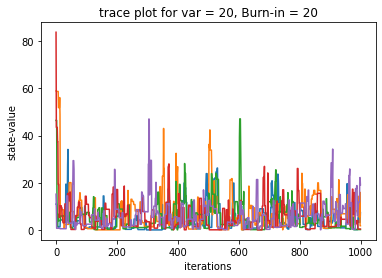

In [140]:
%matplotlib inline
for i in range(5):
    plt.plot([i for i in range(n_samples)][0:1000],all_samples[i][0:1000])
plt.title('trace plot for var = 20, Burn-in = 20')
plt.xlabel('iterations')
plt.ylabel('state-value')
plt.show()

In [141]:
for i in range(len(all_samples)):
    B = 20
    print(len(np.unique(all_samples[i][0:B]))/B, len(np.unique(all_samples[i][B:]))/(n_samples-B))

0.3 0.20080160320641283
0.35 0.21112224448897796
0.3 0.2099198396793587
0.35 0.21122244488977956
0.2 0.20721442885771543


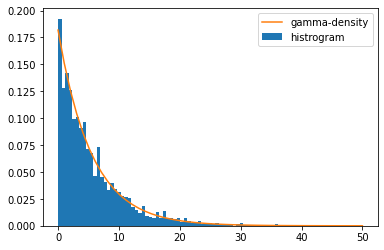

In [142]:
plt.hist(samples[10:], bins = 'auto',density = True)
x = np.linspace(0,50)
plt.plot(x,exact_dist(x,theta))
plt.legend(['gamma-density','histrogram'])
plt.show()